In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sheet_unfolding as su

import time

# N-body simulation

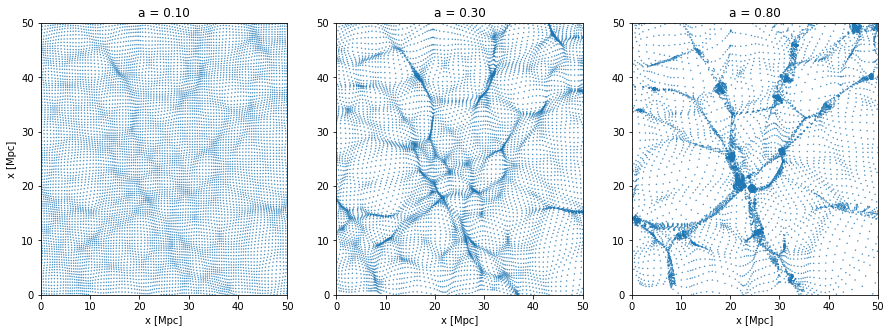

In [16]:
myic = su.sim.IC2DCosmo(ngrid = 256, L=128., rs = 0.5, sigma8=1.0)
mysim = su.sim.CosmologicalSimulation2d(myic, aic=0.05, ngrid_pm=128, verbose=0)

fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, a in enumerate((0.1,0.3,0.8)):
    mysim.integrate_till(a)
    axs[i].set_title("a = %.2f" % a)
    axs[i].scatter(mysim.pos[...,0].flat, mysim.pos[...,1].flat, marker=".", s=(mysim.mass/1e11).flat)
    
axs[0].set_ylabel("x [Mpc]")
for ax in axs.flat:
    ax.set_xlim(0,50)
    ax.set_ylim(0,50)
    
    ax.set_xlabel("x [Mpc]")

# Sticky Simulation (code below not correct for this branch)

In [4]:
sim_sticky = su.sim.CosmologicalSimulation2d(myic, aic=0.05, ngrid_pm=128, alog=[0.1,0.3,0.8], verbose=0, sticky=True)
sim_sticky.integrate_till(0.8)

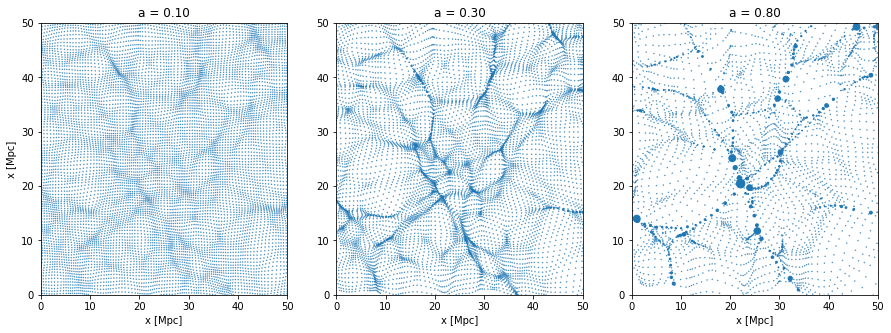

In [5]:
a, pos, mass = sim_sticky.get_log(mode="txm")

fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(0,3):
    axs[i].set_title("a = %.2f" % a[i])
    axs[i].scatter(pos[i,...,0].flat, pos[i,...,1].flat, marker=".", s=(mass[i]/1e11).flat)
    
axs[0].set_ylabel("x [Mpc]")
for ax in axs.flat:
    ax.set_xlim(0,50)
    ax.set_ylim(0,50)
    
    ax.set_xlabel("x [Mpc]")

# Post processing stickiness

In [6]:
sim = su.sim.CosmologicalSimulation2d(myic, aic=0.05, ngrid_pm=128, alog=np.linspace(0.1,0.8,8), verbose=0)
sim.integrate_till(0.8)
a, pos, mass = sim.get_log(mode="txm")

In [7]:
pos_a, mass_a, tri_a, idptr_a = su.multistep_unfold2d(pos[0:1], L=myic.L, mass=myic.mass)
pos_b, mass_b, tri_b, idptr_b = su.multistep_unfold2d(pos[0:3], L=myic.L, mass=myic.mass)
pos_c, mass_c, tri_c, idptr_c = su.multistep_unfold2d(pos[0:8], L=myic.L, mass=myic.mass)

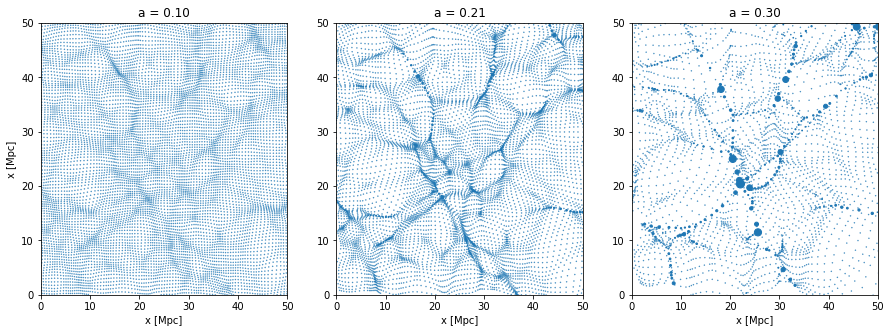

In [8]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(0,3):
    axs[i].set_title("a = %.2f" % a[i])

axs[0].scatter(pos_a[...,0].flat, pos_a[...,1].flat, marker=".", s=(mass_a/1e11).flat)
axs[1].scatter(pos_b[...,0].flat, pos_b[...,1].flat, marker=".", s=(mass_b/1e11).flat)
axs[2].scatter(pos_c[...,0].flat, pos_c[...,1].flat, marker=".", s=(mass_c/1e11).flat)
    
axs[0].set_ylabel("x [Mpc]")
for ax in axs.flat:
    ax.set_xlim(0,50)
    ax.set_ylim(0,50)
    
    ax.set_xlabel("x [Mpc]")

# Lag space plots

Text(0.5, 1.0, 'MS10 Postprocessing Stickiness')

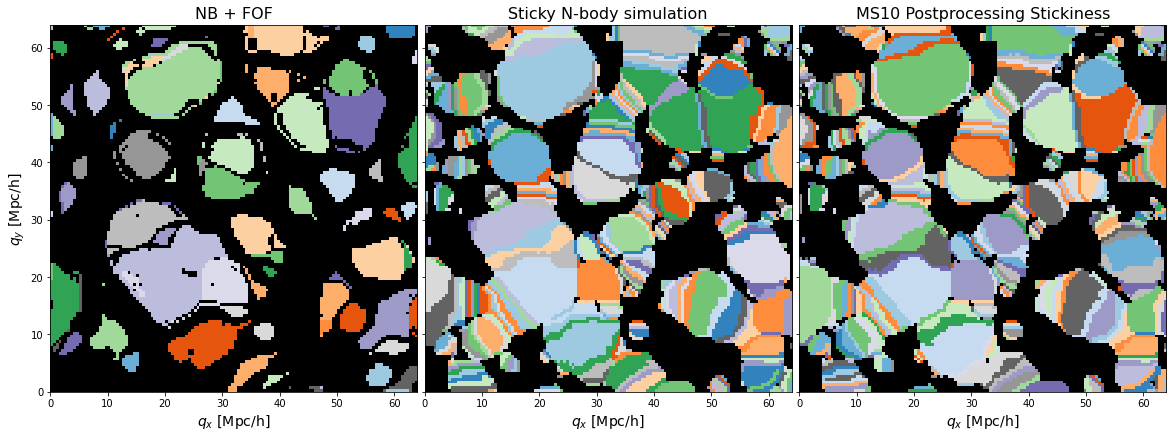

In [9]:
fig, axs = plt.subplots(1,3,figsize=(20,7), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.02)

for ax in axs:
    ax.set_xlim(0,64)
    ax.set_ylim(0,64)
    ax.set_xlabel(r"$q_x$ [Mpc/h]", fontsize=14)

extent = (0,myic.L,0,myic.L)
su.plots.nb_fof_plot(axs[0], sim.pos, linking_length=0.15, extent=extent)
su.plots.plot_id_lagrangian_2d(axs[1], sim_sticky.mass, sim_sticky.stickiness.idptr, extent=extent)
su.plots.plot_id_lagrangian_2d(axs[2], mass_c, idptr_c, extent=extent)

axs[0].set_ylabel(r"$q_y$ [Mpc/h]", fontsize=14)

axs[0].set_title("NB + FOF", fontsize=16)
axs[1].set_title("Sticky N-body simulation", fontsize=16)
axs[2].set_title("MS10 Postprocessing Stickiness", fontsize=16)

In [10]:
mask = su.math.halo_mask_2d(pos_c, idptr_c, L=myic.L)

Text(0.5, 1.0, 'MS10 Filaments')

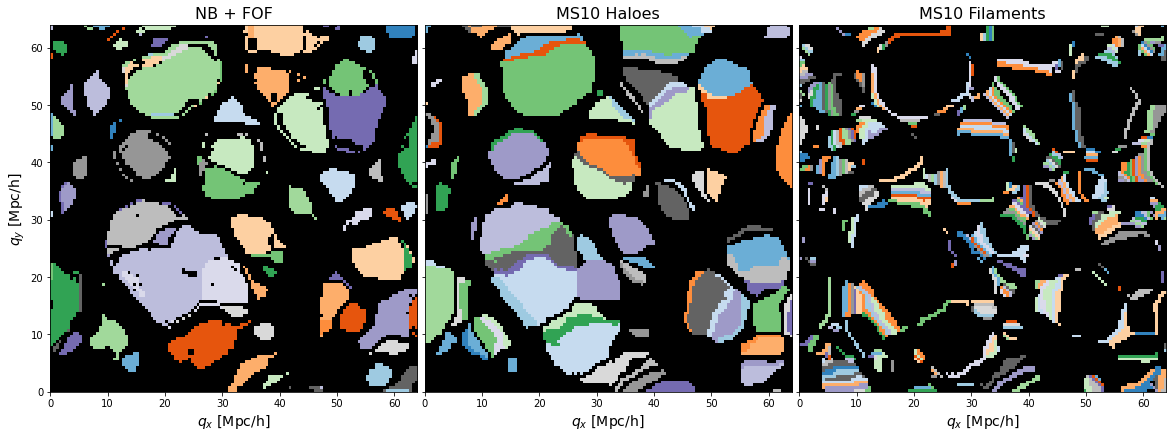

In [11]:
fig, axs = plt.subplots(1,3,figsize=(20,7), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.02)

for ax in axs:
    ax.set_xlim(0,64)
    ax.set_ylim(0,64)
    ax.set_xlabel(r"$q_x$ [Mpc/h]", fontsize=14)

extent = (0,myic.L,0,myic.L)
su.plots.nb_fof_plot(axs[0], sim.pos, linking_length=0.15, extent=extent)
su.plots.plot_id_lagrangian_2d(axs[1], mass_c, idptr_c, extent=extent, mask=mask)
su.plots.plot_id_lagrangian_2d(axs[2], mass_c, idptr_c, extent=extent, mask=~mask)

axs[0].set_ylabel(r"$q_y$ [Mpc/h]", fontsize=14)

axs[0].set_title("NB + FOF", fontsize=16)
axs[1].set_title("MS10 Haloes", fontsize=16)
axs[2].set_title("MS10 Filaments", fontsize=16)